# Inferência 2

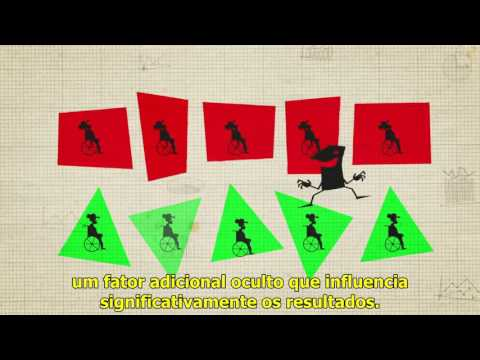

In [2]:
# ** Paradoxo de Simpson e regressão linear multipla **
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hO8NMIU20Ck')

# Paradoxo de Simpson

<br>
<img src="simpson_paradox.png" width="450" />
<br>

O paradoxo de Simpson (ou reversão de Simpson, efeito Yule-Simpson, paradoxo de amalgamação ou paradoxo de reversão) é um fenômeno em probabilidade e estatística, no qual uma tendência aparece em vários grupos diferentes de dados, mas desaparece ou reverte quando esses grupos são combinado.

Este resultado é freqüentemente encontrado em estatísticas de ciências sociais e ciências médicas e é particularmente problemático quando dados de frequência são indevidamente dadas interpretações causais. Os elementos paradoxais desaparecem quando as relações causais são levadas em consideração. Ele tem sido usado para tentar informar o público não especialista ou público sobre o tipo de resultados enganosos que estatísticas erradas podem gerar. Martin Gardner escreveu um relato popular do paradoxo de Simpson em sua coluna de Jogos Matemáticos de março de 1976 na Scientific American.

Edward H. Simpson descreveu esse fenômeno pela primeira vez em um artigo técnico em 1951, mas os estatísticos Karl Pearson et al., Em 1899, e Udny Yule, em 1903, mencionaram efeitos semelhantes anteriormente. O nome paradoxo de Simpson foi introduzido por Colin R. Blyth em 1972.

## Exemplo: Tratamento de pedra nos rins

Este é um exemplo da vida real de um estudo médico comparando as taxas de sucesso de dois tratamentos para cálculos renais.

A tabela abaixo mostra as taxas de sucesso e o número de tratamentos para tratamentos envolvendo cálculos renais pequenos e grandes, onde o Tratamento A inclui todos os procedimentos cirúrgicos abertos e o Tratamento B é a nefrolitotomia percutânea (que envolve apenas uma pequena punção). Os números entre parênteses indicam o número de casos de sucesso sobre o tamanho total do grupo.

<br>
<img src="simpson_kidney.png" width="450" />
<br>

A conclusão paradoxal é que o tratamento A é mais eficaz quando usado em pedras pequenas, e também quando usado em pedras grandes, mas o tratamento B é mais eficaz quando se considera os dois tamanhos ao mesmo tempo. Neste exemplo, a variável "à espreita" (ou variável de confusão) é a gravidade do caso (representada pela tendência da decisão de tratamento dos médicos de favorecer B para casos menos graves), que não era previamente conhecida como importante até que seus efeitos fossem incluído.

Qual tratamento é considerado melhor é determinado por uma desigualdade entre duas razões (sucessos / total). A inversão da desigualdade entre as razões, que cria o paradoxo de Simpson, acontece porque dois efeitos ocorrem juntos:

Os tamanhos dos grupos, que são combinados quando a variável oculta é ignorada, são muito diferentes. Os médicos tendem a dar aos casos graves (pedras grandes) o melhor tratamento (A), e os casos mais leves (pedras pequenas) ao tratamento inferior (B). Portanto, os totais são dominados pelos grupos 3 e 2, e não pelos dois grupos muito menores 1 e 4.

A variável oculta tem um grande efeito nas proporções; i.e., a taxa de sucesso é mais fortemente influenciada pela gravidade do caso do que pela escolha do tratamento. Portanto, o grupo de pacientes com cálculos grandes utilizando o tratamento A (grupo 3) piorou que o grupo com cálculos pequenos (grupos 1 e 2), mesmo se este último utilizou o tratamento inferior B (grupo 2).

Com base nesses efeitos, o resultado paradoxal é visto pela supressão do efeito causal da gravidade do caso no tratamento bem-sucedido. O resultado paradoxal pode ser reformulado mais precisamente da seguinte forma: quando o tratamento menos eficaz (B) é aplicado com maior frequência a casos menos graves, pode parecer um tratamento mais eficaz.

Vamos trabalhar com os dados para verificar a ocorrência do Paradoxo da Simpson

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [162]:
df = pd.DataFrame([['A','small', 81, 87],
                   ['A','large', 192, 263],
                   ['B','small', 234, 270],
                   ['B','large', 55, 80],], columns=['kidney_stone_size', 'treatment', 'recovery', 'total'])   
df
#simpsons_paradox( df, 'recovery', 'total', 'treatment', 'kidney_stone_size' )

,kidney_stone_size,treatment,recovery,total
0,A,small,81,87
1,A,large,192,263
2,B,small,234,270
3,B,large,55,80


## Total por tipo de tratamento

Analisando os valores totais, podemos concluir que o tratamento B é mais bem sucedido que o tratamento A.

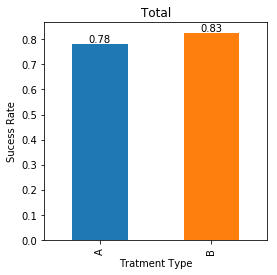

In [163]:
df_stone_size = df.groupby('kidney_stone_size').sum()
df_stone_size['rate'] = df_stone_size.recovery/df_stone_size.total

list = df_stone_size['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_stone_size['rate'].plot(kind='bar')
ax.set_title('Total')
ax.set_xlabel('Tratment Type')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')

## Parciais por tipo de tamanho da pedra (Large & Small)

Por outro lado, analisando as parciais para os tipos de tamanho de pedra, constatamos que o tratamento A é mais bem sucedido que o tratamento B.

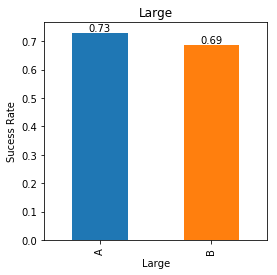

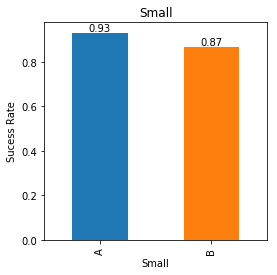

In [204]:
df_large = df[df.treatment == 'large']
df_large = df_large.set_index('kidney_stone_size')
df_large['rate'] = df_large.recovery/df_large.total

list = df_large['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_large['rate'].plot(kind='bar')
ax.set_title('Large')
ax.set_xlabel('Large')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')
    
df_small = df[df.treatment == 'small']
df_small = df_small.set_index('kidney_stone_size')
df_small['rate'] = df_small.recovery/df_small.total

list = df_small['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_small['rate'].plot(kind='bar')
ax.set_title('Small')
ax.set_xlabel('Small')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')

## Modelo para detecção do Paradoxo de Simpson, para o tratamento de pedras nos rins

In [205]:
# detect simpson's paradox
import numpy as np
import pandas as pd


def aggregate_data(df, conversion_col, treatment_col, segment_col):
    """
    takes table of individual level data and aggregates it for simpsons paradox detection.
    conversion_col is 1 if success, 0 else. 
    ex:
    pd.DataFrame([
        ['small', 'A', 1],
        ['small', 'B', 0],
        ['large', 'A', 1],
        ['small', 'A', 1],
        ['large', 'B', 0],
        ['large', 'B', 0],
    ], columns=['kidney_stone_size', 'treatment', 'recovery'])   
    """
    df_ = df[[conversion_col, treatment_col, segment_col]]
    gb = df_.groupby([segment_col, treatment_col]).agg(
        [np.sum, lambda x: len(x)])
    gb.columns = [conversion_col, "total"]

    return gb.reset_index()


def simpsons_paradox(df, conversion_col, total_col, treatment_col, segment_col):
    """
    given a dataframe like:
        pd.DataFrame([
            ['small', 'A', 81, 87],
            ['small', 'B', 234, 270],
            ['large', 'A', 192, 263],
            ['large', 'B', 55, 80],
        ], columns=['kidney_stone_size', 'treatment', 'recovery', 'total'])   
    will determine if simpsons paradox exists. Non Bayesian!
    > simpsons_paradox( df, 'recovery', 'total', 'treatment', 'kidney_stone_size' )    
    """

    # find global optimal:
    gbs = df.groupby(treatment_col).sum()
    print ("## Global rates: ")
    print (gbs[conversion_col] / gbs[total_col])
    print
    global_optimal = (gbs[conversion_col] / gbs[total_col]).argmax()

    # check optimal via segments
    df_ = df.set_index([segment_col, treatment_col])
    rates = (df_[conversion_col] / df_[total_col]).unstack(-1)
    print ("## Local rates:")
    print (rates)
    print
    # find the local optimals
    local_optimals = rates.apply(lambda x: x.argmax(), 1)

    if local_optimals.unique().shape[0] > 1:
        print ("## Simpsons paradox not detected.")
        print ("## Segmented rates do not have a consistent optimal choice")
        print ("## Local optimals:")
        print (local_optimals)
        print ("## Global optimal: ", global_optimal)
        return False

    local_optimal = local_optimals.unique()[0]

    print ("## Global optimal: ", global_optimal)
    print ("## Local optimal: ", local_optimal)
    if local_optimal != global_optimal:
        print ("## Simpsons Paradox detected.")
        return True

    else:
        print ("## Simpsons paradox not detected.")
        return False


if __name__ == "__main__":
    # create some data, indentical to the data at
    # http://en.wikipedia.org/wiki/Simpsons_paradox
    d = []
    d += ([('A', 'small', 1)] * 81)
    d += ([('A', 'small', 0)] * (87 - 81))
    d += ([('B', 'small', 0)] * (270 - 234))
    d += ([('B', 'small', 1)] * (234))
    d += ([('B', 'large', 1)] * (55))
    d += ([('B', 'large', 0)] * (80 - 55))
    d += ([('A', 'large', 0)] * (263 - 192))
    d += ([('A', 'large', 1)] * (192))

    df = pd.DataFrame(
        d, columns=['treatment', 'kidney_stone_size', 'recovery'])
    gb = aggregate_data(df, 'recovery', 'treatment', 'kidney_stone_size')
simpsons_paradox(gb, 'recovery', 'total', 'treatment', 'kidney_stone_size')

## Global rates: 
treatment
A    0.780000
B    0.825714
dtype: float64
## Local rates:
treatment                 A         B
kidney_stone_size                    
large              0.730038  0.687500
small              0.931034  0.866667
## Global optimal:  B
## Local optimal:  A
## Simpsons Paradox detected.


True

# Teste Bayesiano A / B com Python

O teste A/B já é muito conhecido entre as pessoas que trabalham com dados e utilizam ferramentas no processo de tomada de decisão. 

Vamos realizar um experimento aleatório para conversão de usuários de uma *landing page*, onde temos que decidir entre uma llama (**alpaca**) ou um urso (**bear**) para obter o melhor resultado na conversão de usuários.

Para o artigo original [clique aqui](https://medium.com/hockey-stick/tl-dr-bayesian-a-b-testing-with-python-c495d375db4d).

<br>
<img src="bear.png" width="450" />
<br>

## A distribuição BETA

A idéia geral por trás do teste de taxa de conversão bayesiana é gerar duas distribuições que cobrem todas as taxas possíveis e atualizá-las com informações sobre o desempenho do teste e ajustar nossa expectativa da taxa mais representativa de acordo.

Podemos representar isso aqui com uma distribuição Beta que possui dois parâmetros: α, que representa as conversões bem-sucedidas e β, que representa as pessoas que saíram sem converter.

Os gráficos a seguir representam duas distribuições sendo a primeira com 16 conversões de um total de 100 cliques, e a segunda com 8 conversões de um total de 50 cliques, sendo que esta última será adotada como dados verdadeiros para o problema, além da simulação.

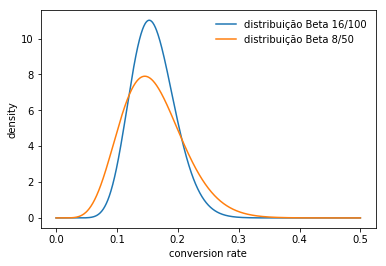

In [486]:
# For our graph
fig, ax = plt.subplots(1, 1)

# Generate and plot the distributions!
c_distribution = beta(16, 100-16)
e_distribution = beta(8, 50-8)

ax.plot(x, c_distribution.pdf(x),label='distribuição Beta 16/100')
ax.plot(x, e_distribution.pdf(x),label='distribuição Beta 8/50')

ax.set(xlabel='conversion rate', ylabel='density')

ax.legend(loc='best', frameon=False)
plt.show()

# Início do experimento A / B

A hipótese nula portanto será de que os ursos performam melhor que as alpacas, e com isso precisamos verificar se esta melhora é estatísticamente relevante para um grau de significância de 95% (p-value <0.5).

Vamos assumir para a nossa simulação que a taxa de conversão do grupo de controle (alpacas) é de 16%, e que o grupo do experimento (ursos) performam 10% melhor.

Esta modelagem será feita inicialmente gerando um pequeno número de resultados aleatórios entre 0 e 1 (tamanho da amostra de 50), depois depois .

O corte representa nossa taxa de conversão real e os *outputs* são os resultados das taxas de sucesso de controle (alpacas) e experimento (urso). Além disso, vamos adicionar dados reais de que anteriormente foram obtidos 8 sucessos em conversão e 42 fracassos, de um total de 50 cliques.

In [487]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

people_in_branch = 50

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, people_in_branch)

c_rate = 0.16
g_factor = 1.1
e_rate = c_rate * g_factor # A TAXA DE CONVERSÃO DO GRUPO EXPERIMENTO É DE 0.176

c_successes = sum(control < c_rate)

# Bears are about 15% better relative to Alpacas
e_successes = sum(experiment < e_rate)

c_failures = people_in_branch - c_successes
e_failures = people_in_branch - e_successes

c_true_rate = c_successes/people_in_branch
e_true_rate = e_successes/people_in_branch

print('taxa de sucesso do controle =',c_true_rate,'taxa de sucesso do experimento =',e_true_rate)

# Our Priors
prior_successes = 8
prior_failures = 42

taxa de sucesso do controle = 0.2 taxa de sucesso do experimento = 0.16


### Dados iniciais

Após gerar dados aleatórios sobre a os totais de cliques em cada uma das opções (alpacas ou ursos), podemos concluir que estão seguindo premissas inicias que os ursos performam 10% melhor do que as alpacas.

Vamos dar uma olhada nos resultados da nossa experiência. A primeira coisa que fazemos é pegar nossa pequena quantidade de dados iniciais e adicionar os resultados prévios aos dois ramos (alpacas e ursos). Depois disso, geramos as distribuições posteriores e fazemos alguns gráficos dos resultados.

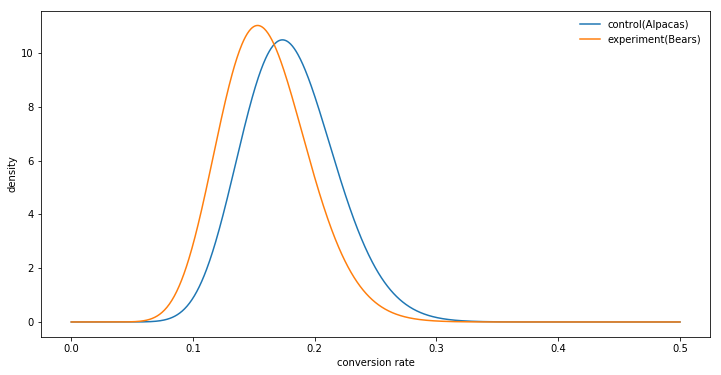

In [488]:
# For our graph
fig, ax = plt.subplots(1, 1,figsize=(12,6)) 

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x),label='control(Alpacas)')
ax.plot(x, e_distribution.pdf(x),label='experiment(Bears)')

ax.set(xlabel='conversion rate', ylabel='density')
ax.legend(loc='best', frameon=False)
plt.show()

Através dos resultados do gráfico acima, podemos ver uma diferença entre os dois ramos, mas eles se sobrepõem tanto que é difícil dizer qual é o verdadeiro vencedor. (Nota: Eles poderiam separar aleatoriamente aqui, mas isso ainda seria um resultado fraco devido ao baixo tamanho da amostra).

Portanto, vamos aumentar o tamanho da amostragem de dados para 4000 e verificar os resultados.

## Dados com tamanho da amostra de 4000 observações

In [489]:
more_people_in_branch = 4000

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, more_people_in_branch)

# Add to existing data
c_successes += sum(control < c_rate)
e_successes += sum(experiment < e_rate)

c_failures += more_people_in_branch - sum(control < c_rate)
e_failures += more_people_in_branch - sum(experiment < e_rate)

c_true_rate = c_successes/more_people_in_branch
e_true_rate = e_successes/more_people_in_branch

print('taxa de sucesso do controle =',c_true_rate,'taxa de sucesso do experimento =',e_true_rate)

taxa de sucesso do controle = 0.15975 taxa de sucesso do experimento = 0.18125


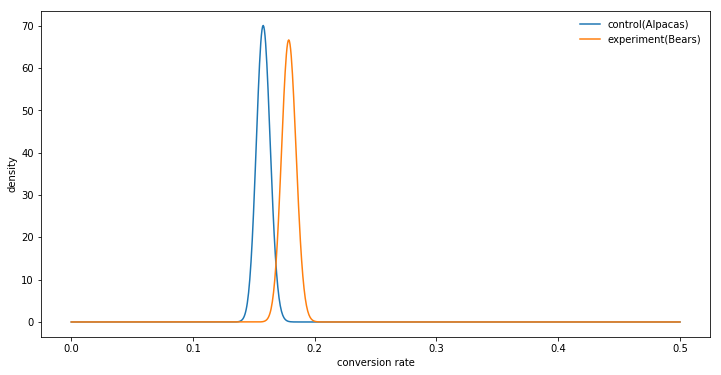

<Figure size 1296x1152 with 0 Axes>

In [490]:
""" COM ADICAO DOS VALORES PRIOR"""

# For our graph
fig, ax = plt.subplots(1, 1,figsize=(12,6)) 

from matplotlib.pyplot import figure
figure(figsize=(18, 16))

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x),label='control(Alpacas)')
ax.plot(x, e_distribution.pdf(x),label='experiment(Bears)')

ax.set(xlabel='conversion rate', ylabel='density')
ax.legend(loc='best', frameon=False)
plt.show()

### Análise da diferença entre o grupo controle e o grupo do experimento, com o aumento das observações

Podemos perceber que o alto número de observações faz com que a vairância diminua, e dessa forma fica mais claro a diferença entre o grupo controle (alpacas) e o grupo do experimento (ursos). 

Vamos calcular a probabilidade acumulada para as duas curvas de densidade de distribuição de sucesso para os dois casos com **ppf** (percentage point function) e comparar os resultados. Na sequência, plotamos o gráfico do ganho em sucesso da diferença entre os grupos controle e experimento com **cdf** (cumulative distribution function).

In [491]:
# Arguments are x values so use ppf - the inverse of cdf
print(c_distribution.ppf([0.025, 0.5, 0.975]))
print(e_distribution.ppf([0.025, 0.5, 0.975]))

# [ 0.14443947  0.15530981  0.16661068]
# [ 0.15770843  0.16897057  0.18064618]

[0.14680681 0.15774923 0.16911913]
[0.16720304 0.17872825 0.19065475]


[Text(0,0.5,'CDF'), Text(0.5,0,'Bears / Alpacas')]

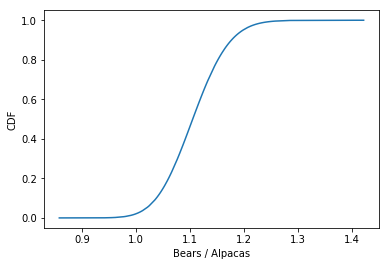

In [492]:
fig, ax = plt.subplots(1, 1)

ser = pd.Series(e_samples/c_samples)

# Make the CDF
ser = ser.sort_values()
ser[len(ser)] = ser.iloc[-1] 
cum_dist = np.linspace(0., 1., len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)

ax.plot(ser_cdf)
ax.set(xlabel='Bears / Alpacas', ylabel='CDF')

## Tirando conclusões sobre a hipótese nula

Vamos comparar o resultado do **p-value** das distribuições com **rsv** (random variates) para um tamanho de amostra de 1 milhão de observações e tirar a conclusão se empiricamente a diferença de cliques de sucesso com grupo do experimento (ursos) é estísticamente relevante.

In [493]:
sample_size = 10000000

c_samples = pd.Series([c_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([e_distribution.rvs() for _ in range(sample_size)])

p_value = 1.0 - sum(e_samples > c_samples)/sample_size

# 0.046830000000000038

In [494]:
p_value

0.005507400000000051

In [495]:
p_value < 0.05

True

In [496]:
if p_value < 0.05:
    print('Os ursos são melhores que as Alpacas: hipótese nula não rejeitada: ursos fazem diferença na landing page.')
else:
    print('Os ursos não são melhores que as Alpacas: hipótese nula rejeitada: ursos não fazem diferença na landing page.')

Os ursos são melhores que as Alpacas: hipótese nula não rejeitada: ursos fazem diferença na landing page.
